<a href="https://colab.research.google.com/github/Edudeiko/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_SC_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

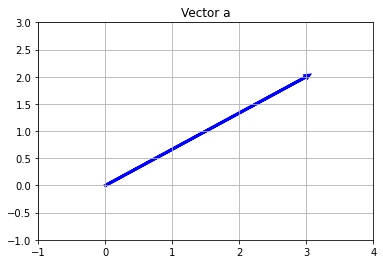

In [26]:
import matplotlib.pyplot as plt

# Vector Coordinates
a = [3, 2]

# Plot the Vector
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,4)          
plt.ylim(-1,3)
plt.title("Vector a")
plt.grid()
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [2]:
import numpy as np

b = np.array([17, -4, -1, 1])
norm_of_b = np.linalg.norm(b)

print(norm_of_b)

17.52141546793523


The norm of a vector is its length, also known as its "magnitude."

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [3]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

dot_product = np.dot(c,d)

print(dot_product)

42


These vectors are not orthogonal because their dot-product != 0. Only vectors whose dot product is 0 must be orthogonal.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [ ]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
              
print("Inverse: \n", np.linalg.inv(E))
print('\n')
print("Transpose: \n", E.T)

Inverse: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


Transpose: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [ ]:
F = np.array([[2,-2,5],[4,1,10],[12,6,30]])

print("Determinant:", np.linalg.det(F))

Determinant: 0.0


The determinant of a matrix will be 0 whenever there is linear dependence between the vectors of that matrix. Linear Dependence means that there are redundant vectors that could be created via a linear combination of the other vectors in the matrix.

A matrix with a determinant of 0 could also be created via the one-hot encoding of categorical variables where dummy variables for all categories are maintained in the matrix

A matrix with a determinant of 0 could also be created by doing unit conversions on a column and then keeping both the original column and the converted column, this is a simpler version of creating linearly dependent columns, but is a common way that we sometimes do this accidentally when cleaning our data or doing feature engineering.

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [4]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

import pandas as pd
df = pd.DataFrame({'customers': customers, 'snow': snow})
df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [ ]:
print('Mean: ')
print(df.mean())
print('\n Variance: ')
print(df.var())
print('\n Standard Deviation: ')
print(df.std())

Mean: 
customers    1135.714286
snow            2.714286
dtype: float64

 Variance: 
customers    98761.904762
snow             8.571429
dtype: float64

 Standard Deviation: 
customers    314.264069
snow           2.927700
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variances of customers and snow are not comparable because 
they have a different scale/range. They must be standardized in order to be comparable (take their square roots to turn them into **Standard** Deviation measures).

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [ ]:
df.cov()  

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

In [5]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# IMPORTANT NOTE: You can get a list of dataframe column headers.
# I don't want you to feel like you have to type them all out

print(df.columns)

# Look at the data
df.head()

Index(['Country', 'Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish',
       'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'],
      dtype='object')


,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [6]:
# Only numeric columns in dataframe for pasing to PCA
X = df.drop('Country', axis=1).values
X

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z = scaler.fit_transform(X)

print("Standardized Data: \n", Z)

Standardized Data: 
 [[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]


In [11]:
round(Z.mean()), Z.std()

(0.0, 1.0)

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

eigenvalues:  [6.81637385 4.1124781 ]
 
 data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]] 



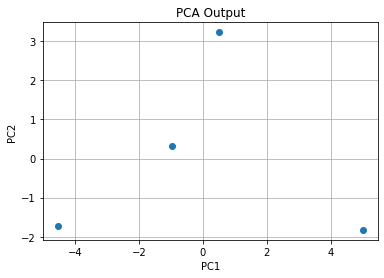

In [12]:
from sklearn.decomposition import PCA

# Calculate PCA
pca = PCA(n_components=2)
pca.fit(Z)
output = pca.transform(Z)

# Print eigenvales
print("eigenvalues: ", pca.singular_values_)

# print transformed data
print(" \n data: \n", output, '\n')

# Create Scatterplot
plt.scatter(output[:, 0], output[:, 1])
plt.title("PCA Output")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

An eigenvector is any vector that does not change orientation during a linear transformation. These vectors can be scaled (stretched or squished) but they cannot change the direction in which they are pointing. Eigenvalues and eigenvectors always come in pairs where the eigenvalue is the scalar tha representes how much the eigenvector gets stretched or squished by the transformation.

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

In [13]:
import pandas as pd
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


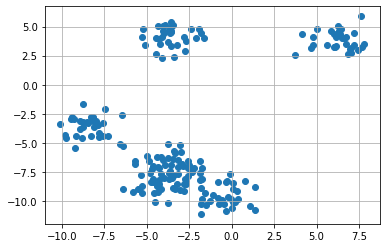

In [14]:
import matplotlib.pyplot as plt
plt.scatter(points['x'],points['y'])
plt.grid()
plt.show()

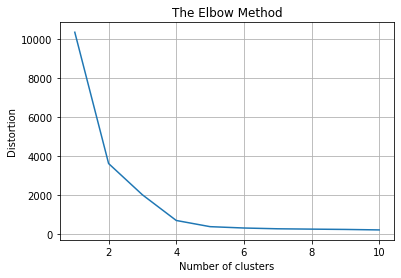

Man, the elbow method kind of sucks...


In [15]:
from sklearn.cluster import KMeans

# List to hold distortion values
distortion = []

# Calculate distortion for # of clusters
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(points)
  distortion.append(kmeans.inertia_)

plt.plot(range(1, 11), distortion)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion') # within cluster sum of squares
plt.grid()
plt.show()

print("Man, the elbow method kind of sucks...")

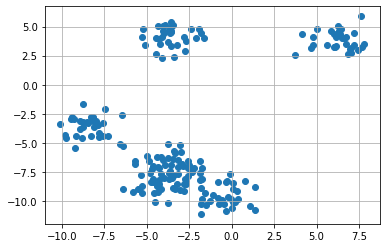

We're going with k=5


In [16]:
plt.scatter(points['x'], points['y'])
plt.grid()
plt.show()

print("We're going with k=5")

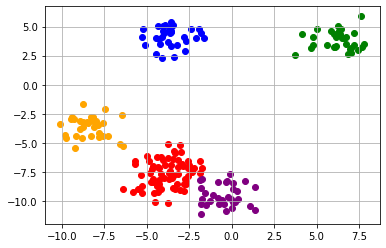

In [25]:
# Calculate Clusters
kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10)
clusters = kmeans.fit_predict(points)

# convert the dataframe to np.array
points = np.array(points)

# Visualize the clusters
plt.scatter(points[clusters == 0, 0], points[clusters == 0, 1], color='red', )
plt.scatter(points[clusters == 1, 0], points[clusters == 1, 1], color='blue')
plt.scatter(points[clusters == 2, 0], points[clusters == 2, 1], color='green')
plt.scatter(points[clusters == 3, 0], points[clusters == 3, 1], color='purple')
plt.scatter(points[clusters == 4, 0], points[clusters == 4, 1], color='orange')

plt.grid()
plt.show()